# Lasagna & Recursion

## The first layer

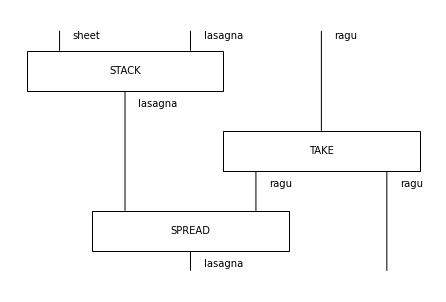

In [1]:
from discopy import Ty, Id, Box

lasagna, ragu, sheet, sheets = map(Ty, 'lasagna ragu sheet sheets'.split())

stack = Box('STACK', sheet @ lasagna, lasagna)
take = Box('TAKE', ragu, ragu @ ragu)
spread = Box('SPREAD', lasagna @ ragu, lasagna)

lasagna_layer = stack @ take >> spread @ Id(ragu)
lasagna_layer.draw()

## The next layer with a functor

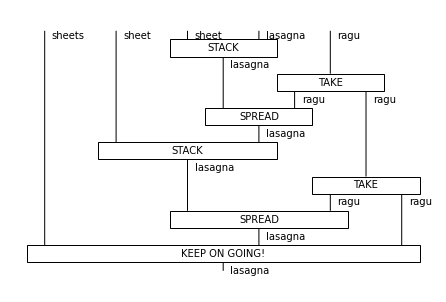

In [2]:
from discopy import Functor

start = Box('KEEP ON GOING!', sheets @ lasagna @ ragu, lasagna)

Next = Functor(
    ob=lambda x:
        sheets @ sheet if x == sheets else x,
    ar=lambda f:
        Id(sheets) @ lasagna_layer >> start
        if f == start else f)

two_layers = Next(Next(start))
two_layers.draw()

## The complete recipe

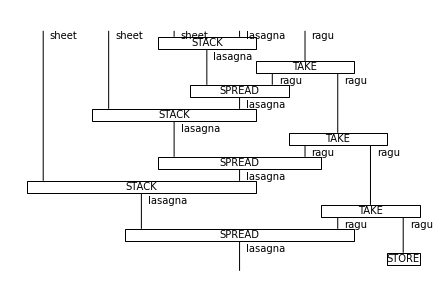

In [3]:
store = Box("STORE", ragu, Ty())

Stop = Functor(
    ob=lambda x: Ty() if x == sheets else x,
    ar=lambda f: Id(lasagna) @ store if f == start else f)

complete_recipe = start
for _ in range(3):
    complete_recipe = Next(complete_recipe)
complete_recipe = Stop(complete_recipe)

complete_recipe.draw()